<a href="https://colab.research.google.com/github/steelpipe75/inhouse-ml-competition-MDXQ-alumni-Jan/blob/main/competition_files/playground/Colab/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習コンペ 分類問題 サンプルノートブック

## コンペデータ取得

GitHubからリポジトリをcloneしてデータを持ってくる

In [1]:
REPO_URL = "https://github.com/steelpipe75/inhouse-ml-competition-MDXQ-alumni-Jan"
REPO_NAME = "inhouse-ml-competition-MDXQ-alumni-Jan"

In [2]:
!git clone {REPO_URL}

Cloning into 'inhouse-ml-competition-MDXQ-alumni-Jan'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 105 (delta 34), reused 80 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (105/105), 122.91 KiB | 1.17 MiB/s, done.
Resolving deltas: 100% (34/34), done.


## ライブラリをインポート

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

## コンペ配布データ読み込み

### 学習用データ読み込み

In [4]:
train_df = pd.read_csv(f"./{REPO_NAME}/competition_files/data/train.csv")

In [5]:
train_df

,id,feature_0,feature_1,target
0,0,0.214094,-1.245739,1
1,1,0.529804,1.441569,1
2,2,0.177701,-1.335344,1
3,3,-1.143726,0.108560,1
4,4,0.224092,0.012592,0
...,...,...,...,...
995,995,-0.440044,0.130741,0
996,996,-0.223463,0.714000,0
997,997,0.436560,0.903935,0
998,998,-0.444293,0.377300,0


### 評価用データ読み込み

In [6]:
test_df = pd.read_csv(f"./{REPO_NAME}/competition_files/data/test.csv")

In [7]:
test_df

,id,feature_0,feature_1
0,1000,-0.641482,0.431923
1,1001,0.166452,0.492451
2,1002,1.227669,-1.209641
3,1003,0.018418,1.676437
4,1004,0.381935,0.430042
...,...,...,...
95,1095,0.289775,2.075401
96,1096,0.243801,-0.564079
97,1097,0.872321,0.183342
98,1098,-1.607560,-0.762725


### サンプル投稿ファイル読み込み

In [8]:
submit = pd.read_csv(f"./{REPO_NAME}/competition_files/data/sample_submission.csv")

In [9]:
submit

,id,cls1_probability
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
95,1095,0
96,1096,0
97,1097,0
98,1098,0


## 前処理

### 説明変数、目的変数に分割

In [10]:
X = train_df[["feature_0", "feature_1"]]
y = train_df["target"]

In [11]:
X

,feature_0,feature_1
0,0.214094,-1.245739
1,0.529804,1.441569
2,0.177701,-1.335344
3,-1.143726,0.108560
4,0.224092,0.012592
...,...,...
995,-0.440044,0.130741
996,-0.223463,0.714000
997,0.436560,0.903935
998,-0.444293,0.377300


In [12]:
y

,target
0,1
1,1
2,1
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [13]:
X_test = test_df[["feature_0", "feature_1"]]

In [14]:
X_test

,feature_0,feature_1
0,-0.641482,0.431923
1,0.166452,0.492451
2,1.227669,-1.209641
3,0.018418,1.676437
4,0.381935,0.430042
...,...,...
95,0.289775,2.075401
96,0.243801,-0.564079
97,0.872321,0.183342
98,-1.607560,-0.762725


### 訓練用データ、検証用データに分割

In [15]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y)

In [16]:
X_train

,feature_0,feature_1
153,-0.646573,-1.081548
412,-0.003603,-1.158365
554,-3.241267,-1.024388
167,-0.362441,-1.119670
210,-1.046911,0.536653
...,...,...
944,0.681953,-0.310267
662,1.500760,0.850222
299,-0.637387,1.189017
722,0.064474,-1.975467


In [17]:
y_train

,target
153,1
412,1
554,1
167,1
210,1
...,...
944,0
662,1
299,1
722,1


In [18]:
X_eval

,feature_0,feature_1
131,0.963879,2.210523
849,0.710960,0.444263
735,-0.429302,-0.692421
57,1.565524,-0.065750
655,0.738467,0.171368
...,...,...
796,1.078681,-0.038508
422,-0.221254,-0.276813
87,-1.150994,0.375698
760,-0.989628,0.940771


In [19]:
y_eval

,target
131,1
849,0
735,0
57,1
655,0
...,...
796,0
422,0
87,1
760,1


## モデルを訓練

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

## 訓練済みモデルによる予測（検証用データ）

In [22]:
y_pred_eval = model.predict_proba(X_eval)

In [23]:
y_pred_eval_df = pd.DataFrame(y_pred_eval)

In [24]:
y_pred_eval_df

,0,1
0,0.407387,0.592613
1,0.478494,0.521506
2,0.533040,0.466960
3,0.491580,0.508420
4,0.489078,0.510922
...,...,...
245,0.494562,0.505438
246,0.514861,0.485139
247,0.496742,0.503258
248,0.473006,0.526994


予測精度の可視化

In [25]:
fpr, tpr, thresholds  = roc_curve(y_eval, y_pred_eval_df[1])
auc = roc_auc_score(y_eval, y_pred_eval_df[1])

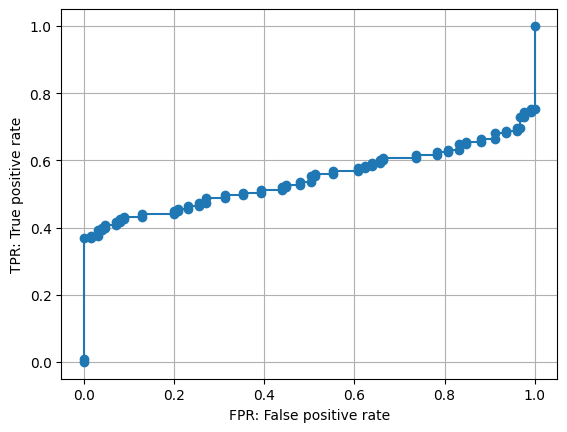

In [26]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [27]:
auc

np.float64(0.54464)

## 訓練済みモデルによる予測（評価用データ）

In [28]:
y_pred_test = model.predict_proba(X_test)

In [29]:
y_pred_test_df = pd.DataFrame(y_pred_test)

In [30]:
y_pred_test_df

,0,1
0,0.490260,0.509740
1,0.481123,0.518877
2,0.539691,0.460309
3,0.435741,0.564259
4,0.481799,0.518201
...,...,...
95,0.418038,0.581962
96,0.522364,0.477636
97,0.487486,0.512514
98,0.545585,0.454415


## 採点用投稿ファイル作成

In [31]:
submit["cls1_probability"] = y_pred_test_df[1]

In [32]:
submit

,id,cls1_probability
0,1000,0.509740
1,1001,0.518877
2,1002,0.460309
3,1003,0.564259
4,1004,0.518201
...,...,...
95,1095,0.581962
96,1096,0.477636
97,1097,0.512514
98,1098,0.454415


In [33]:
submit.to_csv("submit.csv", index=False)